In [1]:
#Importing Data
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import os
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
#Import crime data
crime_file = pd.read_csv('Resources/crime_and_incarceration_by_state.csv')
crime_df = pd.DataFrame(crime_file)

#crime_df['jurisdiction'] = crime_df['jurisdiction'].str.title()

#calculate 'total crimes' column
crime_df['Total Crime'] = crime_df['violent_crime_total'] + crime_df['property_crime_total']

#Reorganize columns and remove unnecessary columns
crime_df = crime_df[['jurisdiction','year','includes_jails','prisoner_count','crime_reporting_change','crimes_estimated','Total Crime']]

#rename columns
crime_df = crime_df.rename(columns = {'jurisdiction' : 'State',
                                      'year' : 'Year',
                                      'includes_jails' : 'Includes Jails' ,
                                      'prisoner_count' : 'Prisoner Count',
                                      'crime_reporting_change' : 'Crime Reporting Change',
                                      'crimes_estimated' : 'Crime Estimated'})
#proper state
crime_df['State'] = crime_df['State'].str.title()
crime_df.head()

,State,Year,Includes Jails,Prisoner Count,Crime Reporting Change,Crime Estimated,Total Crime
0,Federal,2001,False,149852,NaN,NaN,NaN
1,Alabama,2001,False,24741,False,False,192835.0
2,Alaska,2001,True,4570,False,False,26895.0
3,Arizona,2001,False,27710,False,False,322549.0
4,Arkansas,2001,False,11489,False,False,111296.0


In [3]:
#Import education data
edu_file = pd.read_csv('Resources/edu_data.csv')
edu_df = pd.DataFrame(edu_file)


In [4]:
#Import eduome/Poverty data (census)
edu_file = pd.read_csv('Resources/edu_data.csv')
edu_df = pd.DataFrame(edu_file)
edu_df.head()


,State,Year,Male,Female,Total Pop
0,Alaska,2009,1196,1341,683142
1,Alabama,2009,2879,3306,4633360
2,Arkansas,2009,2080,2213,2838143
3,Arizona,2009,4144,3814,6324865
4,California,2009,9341,9954,36308527


In [5]:
#Merge dataframes on state and year...
crime_inc = pd.merge(crime_df,edu_df, on=['State','Year'])
crime_inc.head()

,State,Year,Includes Jails,Prisoner Count,Crime Reporting Change,Crime Estimated,Total Crime,Male,Female,Total Pop
0,Alabama,2009,False,27241,False,False,199201.0,2879,3306,4633360
1,Alaska,2009,True,5472,False,False,24962.0,1196,1341,683142
2,Arizona,2009,False,40544,False,False,264849.0,4144,3814,6324865
3,Arkansas,2009,False,13338,False,False,123983.0,2080,2213,2838143
4,California,2009,False,168830,False,False,1184367.0,9341,9954,36308527


# Data Visuals
### Total Crime vs. Educated Male

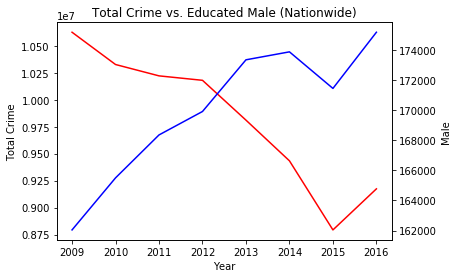

In [6]:
fig, ax1 = plt.subplots()
yearlyCrime = crime_inc.groupby(['Year']).sum()['Total Crime']
ax1.plot(yearlyCrime, color='r')
ax1.set_ylabel('Total Crime')

ax2 = ax1.twinx()
yearly_prisoner = crime_inc.groupby(['Year']).sum()['Male']
ax2.plot(yearly_prisoner, color='b')
ax2.set_ylabel('Male')

ax1.set_xlabel('Year')
plt.title('Total Crime vs. Educated Male (Nationwide)')
plt.savefig("Output/Total_Crime_vs_Male_Nationwide.png")

### Total Crime vs. Educated Female

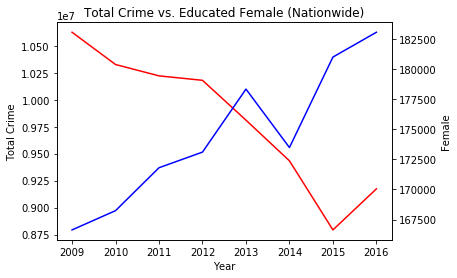

In [7]:
fig, ax1 = plt.subplots()
yearlyCrime = crime_inc.groupby(['Year']).sum()['Total Crime']
ax1.plot(yearlyCrime, color='r')
ax1.set_ylabel('Total Crime')

ax2 = ax1.twinx()
yearly_prisoner = crime_inc.groupby(['Year']).sum()['Female']
ax2.plot(yearly_prisoner, color='b')
ax2.set_ylabel('Female')

ax1.set_xlabel('Year')
plt.title('Total Crime vs. Educated Female (Nationwide)')
plt.savefig("Output/Total_Crime_vs_Female_Nationwide.png")

### Male vs. Female Linear Chart to insure data is trending as expected

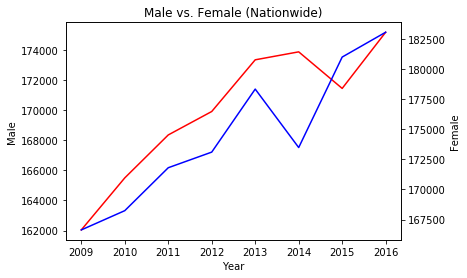

In [8]:
fig, ax1 = plt.subplots()
yearlyCrime = crime_inc.groupby(['Year']).sum()['Male']
ax1.plot(yearlyCrime, color='r')
ax1.set_ylabel('Male')

ax2 = ax1.twinx()
yearly_prisoner = crime_inc.groupby(['Year']).sum()['Female']
ax2.plot(yearly_prisoner, color='b')
ax2.set_ylabel('Female')

ax1.set_xlabel('Year')
plt.title('Male vs. Female (Nationwide)')
# plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
plt.savefig("Output/Male_vs_Female_Nationwide.png")

In [9]:
def gendata(loc=0):
    population = stats.norm.rvs(size=1000, random_state=42)
    sample = stats.norm.rvs(loc=loc, size=200, random_state=42)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

# Created T Test for Statistical significance

### P-Value did not have any statistical significance


In [10]:
# T tests to check for
# Higher Education Levels for each state lead to less incarceration rates over time
educationLevelsForBoth = crime_inc.groupby(['Year']).sum()['Total Pop']
sampleFemale = crime_inc.groupby(['Year']).sum()['Female']
sampleMale = crime_inc.groupby(['Year']).sum()['Male']
sampleTotal = sampleFemale + sampleMale
print(educationLevelsForBoth)
    
stats.ttest_1samp(sampleTotal, educationLevelsForBoth.mean())
    
    
    

# Higher Education Levels for females lead to less incarceration rates over time for each state

# Higher Educatin Levels for males lead to less incarceration rates over tie for each state

Year
2009    300873100
2010    303380872
2011    306009817
2012    308532952
2013    310917223
2014    313473348
2015    315867537
2016    317899153
Name: Total Pop, dtype: int64


Ttest_1sampResult(statistic=-87602.95335993206, pvalue=6.670278475766262e-33)